In this notebook, we use **Gaussian Mixture Models (GMM)** for clustering mall customers based on their demographics and spending behavior.

Unlike KMeans, GMM:
- Is **probabilistic** (soft clustering)
- Assigns a **probability** to each point for belonging to each cluster
- Allows **elliptical cluster shapes** due to Gaussian distributions


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture

- Source: `Mall_Customers.csv` from Kaggle
- Features used:
  - `Age`
  - `Annual Income (k$)`
  - `Spending Score (1-100)`
  - `GenderEncoded` (from `Gender` using Label Encoding)

In [28]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Preprocessing Steps**

1. Load the dataset from the given path
2. Encode `Gender` using `LabelEncoder`
3. Select relevant features for clustering
4. Scale features using `StandardScaler` (DBSCAN is distance-based)

In [29]:
le = LabelEncoder()
df['GenderEncoded'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [30]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'GenderEncoded']]

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

**GMM Clustering**

1. We apply `GaussianMixture(n_components=3)` on the scaled data
2. For each customer:
   - `GMM_Cluster`: assigned cluster label (hard assignment)
   - `GMM_Prob_Max`: probability/confidence of belonging to that cluster


In [32]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

# Predict cluster labels
gmm_labels = gmm.predict(X_scaled)
df['GMM_Cluster'] = gmm_labels


In [33]:
print(df[:10])

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   GenderEncoded  GMM_Cluster  
0              1            0  
1              1            2  
2              0            0  
3              0            2  
4              0         

In [34]:
probs = gmm.predict_proba(X_scaled)
df['GMM_Prob_Max'] = probs.max(axis=1)
print(df[:10])

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   GenderEncoded  GMM_Cluster  GMM_Prob_Max  
0              1            0      0.990978  
1              1            2      0.999973  
2              0            0      1.000000  
3

We visualize clusters using:
   - X-axis: Annual Income
   - Y-axis: Spending Score
   - Color: Cluster assignment from GMM


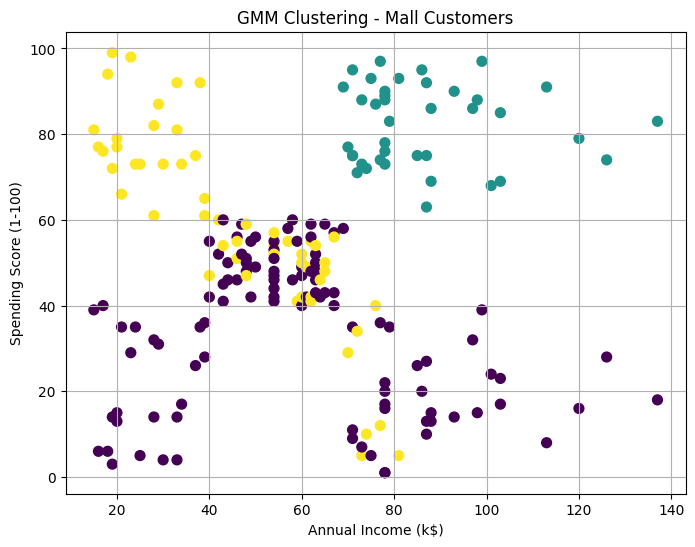

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=gmm_labels, cmap='viridis', s=50)
plt.title("GMM Clustering - Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

This model is useful when customer behavior overlaps or when clusters vary in shape and spread.